In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
802,5.1,0.585,0.00,1.7,0.044,14.0,86.0,0.99264,3.56,0.94,12.9,7
757,8.1,0.870,0.00,2.2,0.084,10.0,31.0,0.99656,3.25,0.50,9.8,5
853,9.3,0.360,0.39,1.5,0.080,41.0,55.0,0.99652,3.47,0.73,10.9,6
992,6.5,0.400,0.10,2.0,0.076,30.0,47.0,0.99554,3.36,0.48,9.4,6
1543,11.1,0.440,0.42,2.2,0.064,14.0,19.0,0.99758,3.25,0.57,10.4,6
1489,6.2,0.570,0.10,2.1,0.048,4.0,11.0,0.99448,3.44,0.76,10.8,6
172,8.0,0.420,0.17,2.0,0.073,6.0,18.0,0.99720,3.29,0.61,9.2,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
933,7.4,0.610,0.01,2.0,0.074,13.0,38.0,0.99748,3.48,0.65,9.8,5
1014,8.0,0.580,0.16,2.0,0.120,3.0,7.0,0.99454,3.22,0.58,11.2,6


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


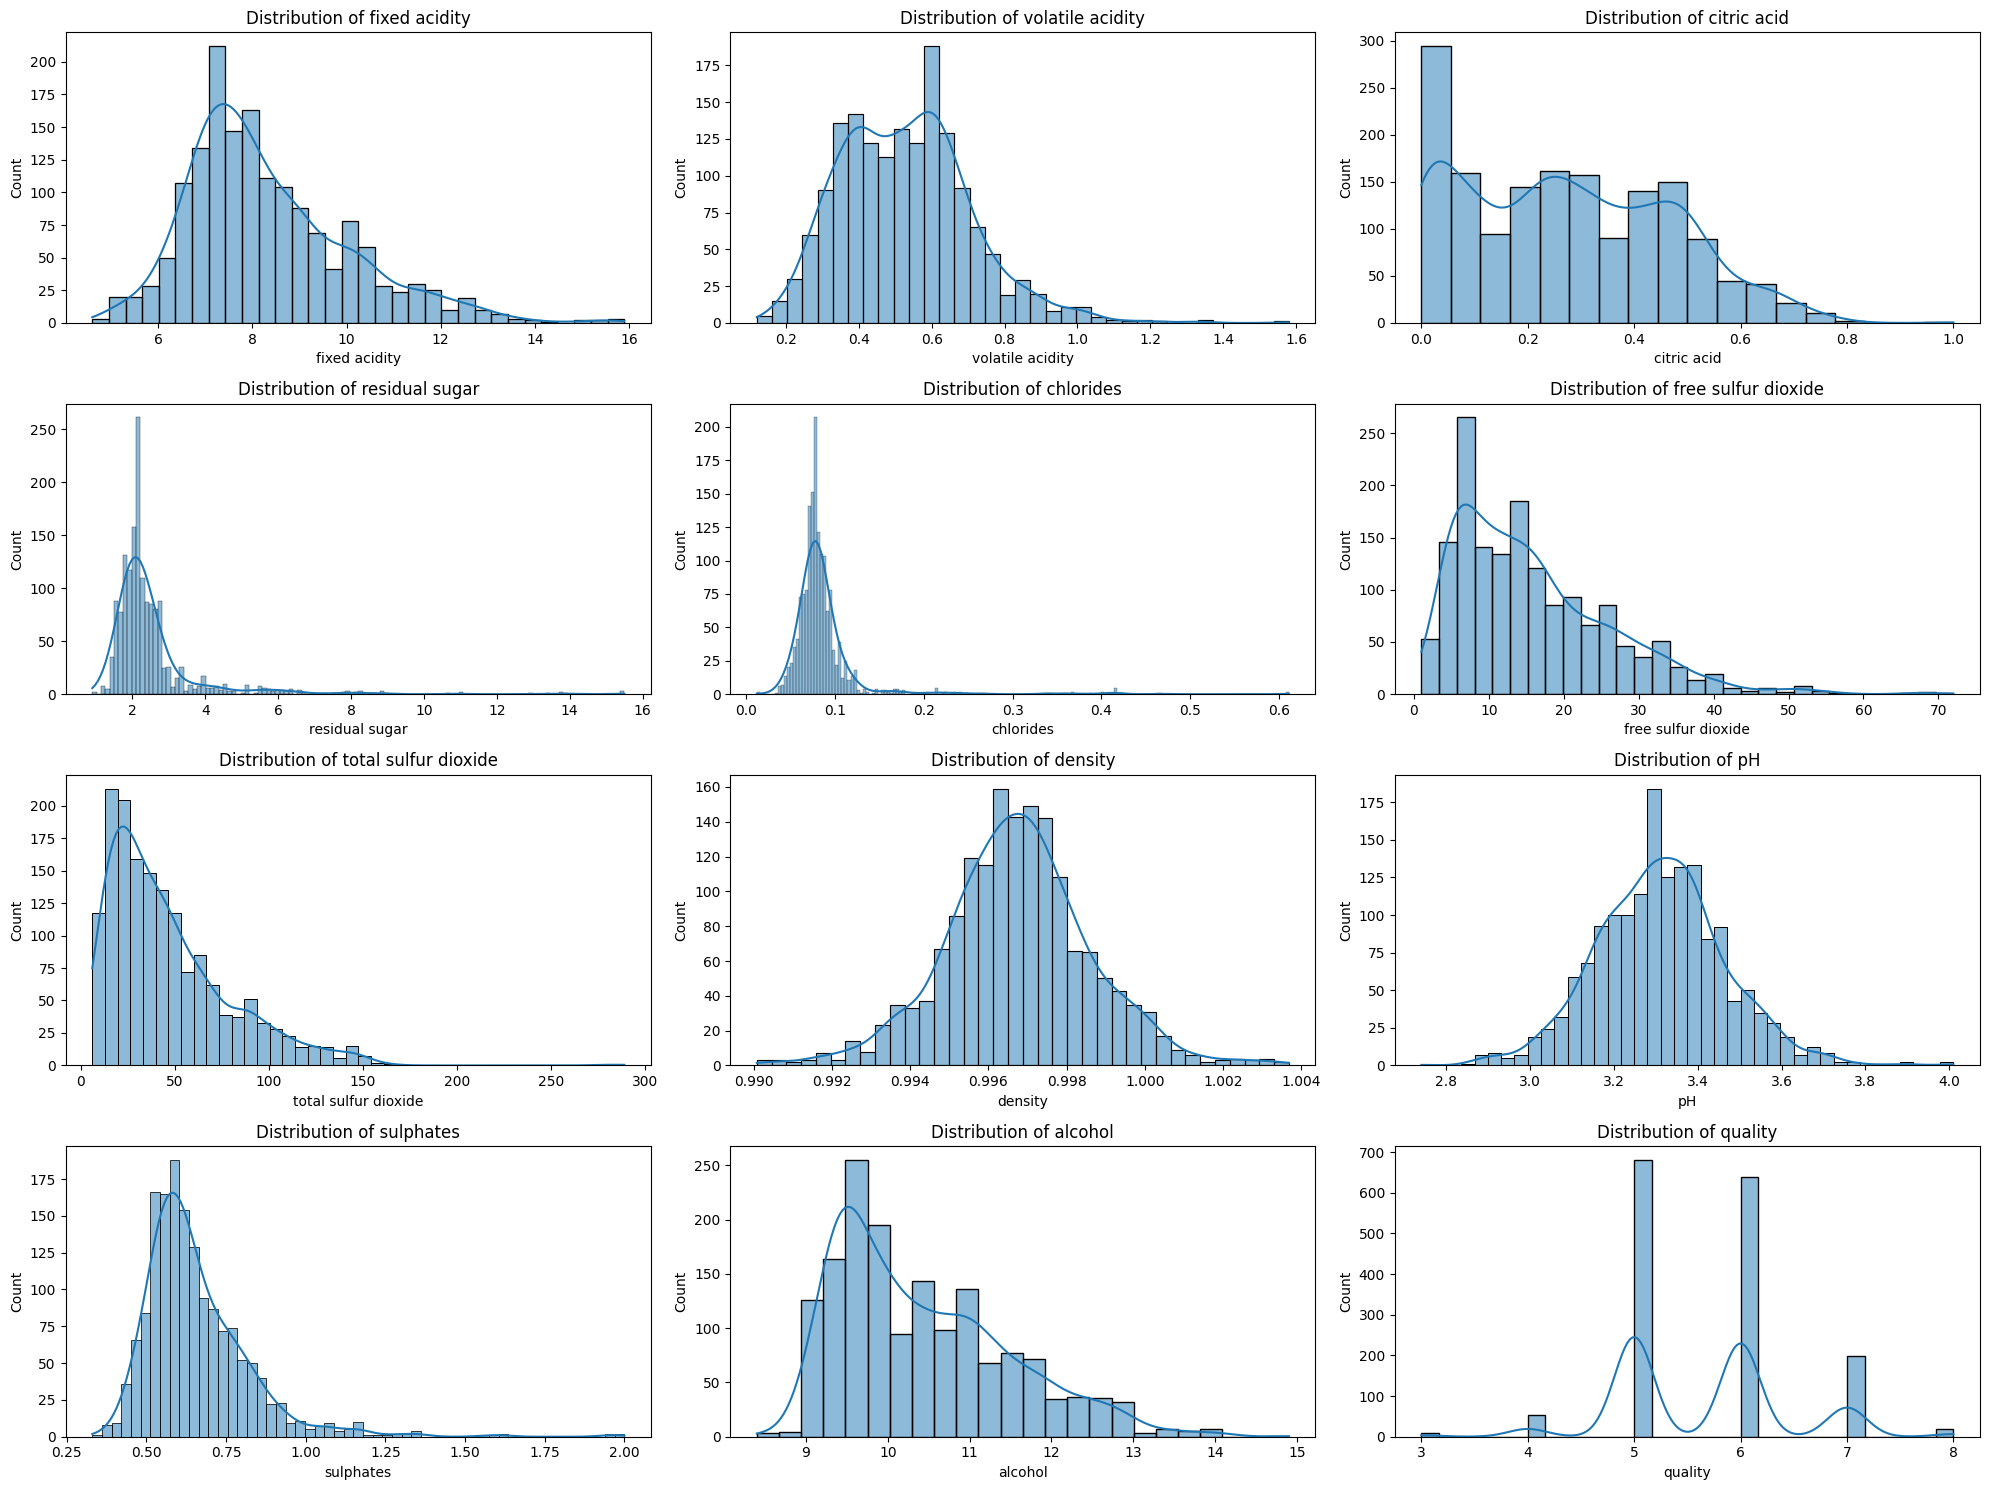

In [6]:
features = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 
    'density', 'pH', 'sulphates', 'alcohol', 'quality'
]

# Plot histograms for each feature
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [8]:
scaler = StandardScaler()

# Standardize the features
scaled_features = scaler.fit_transform(df[features])

# Create a new DataFrame with scaled features
scaled_wine = pd.DataFrame(scaled_features, columns=features)

# Add the target variable back to the DataFrame
scaled_wine['quality'] = df['quality']

# Display the first few rows of the standardized dataset
print(scaled_wine.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1      -0.298547          1.967442    -1.391472        0.043416   0.223875   
2      -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3       1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.028261 -0.719933   0.128950   
2            -0.083669              0.229047  0.134264 -0.331177  -0.048089   
3             0.107592              0.411500  0.664277 -0.979104  -0.461180   
4            -0.466193             -0.379133  0.558274  1.288643  -0.579207   

    alcohol  quality  
0 -0.960246        5  
1 -0.58477

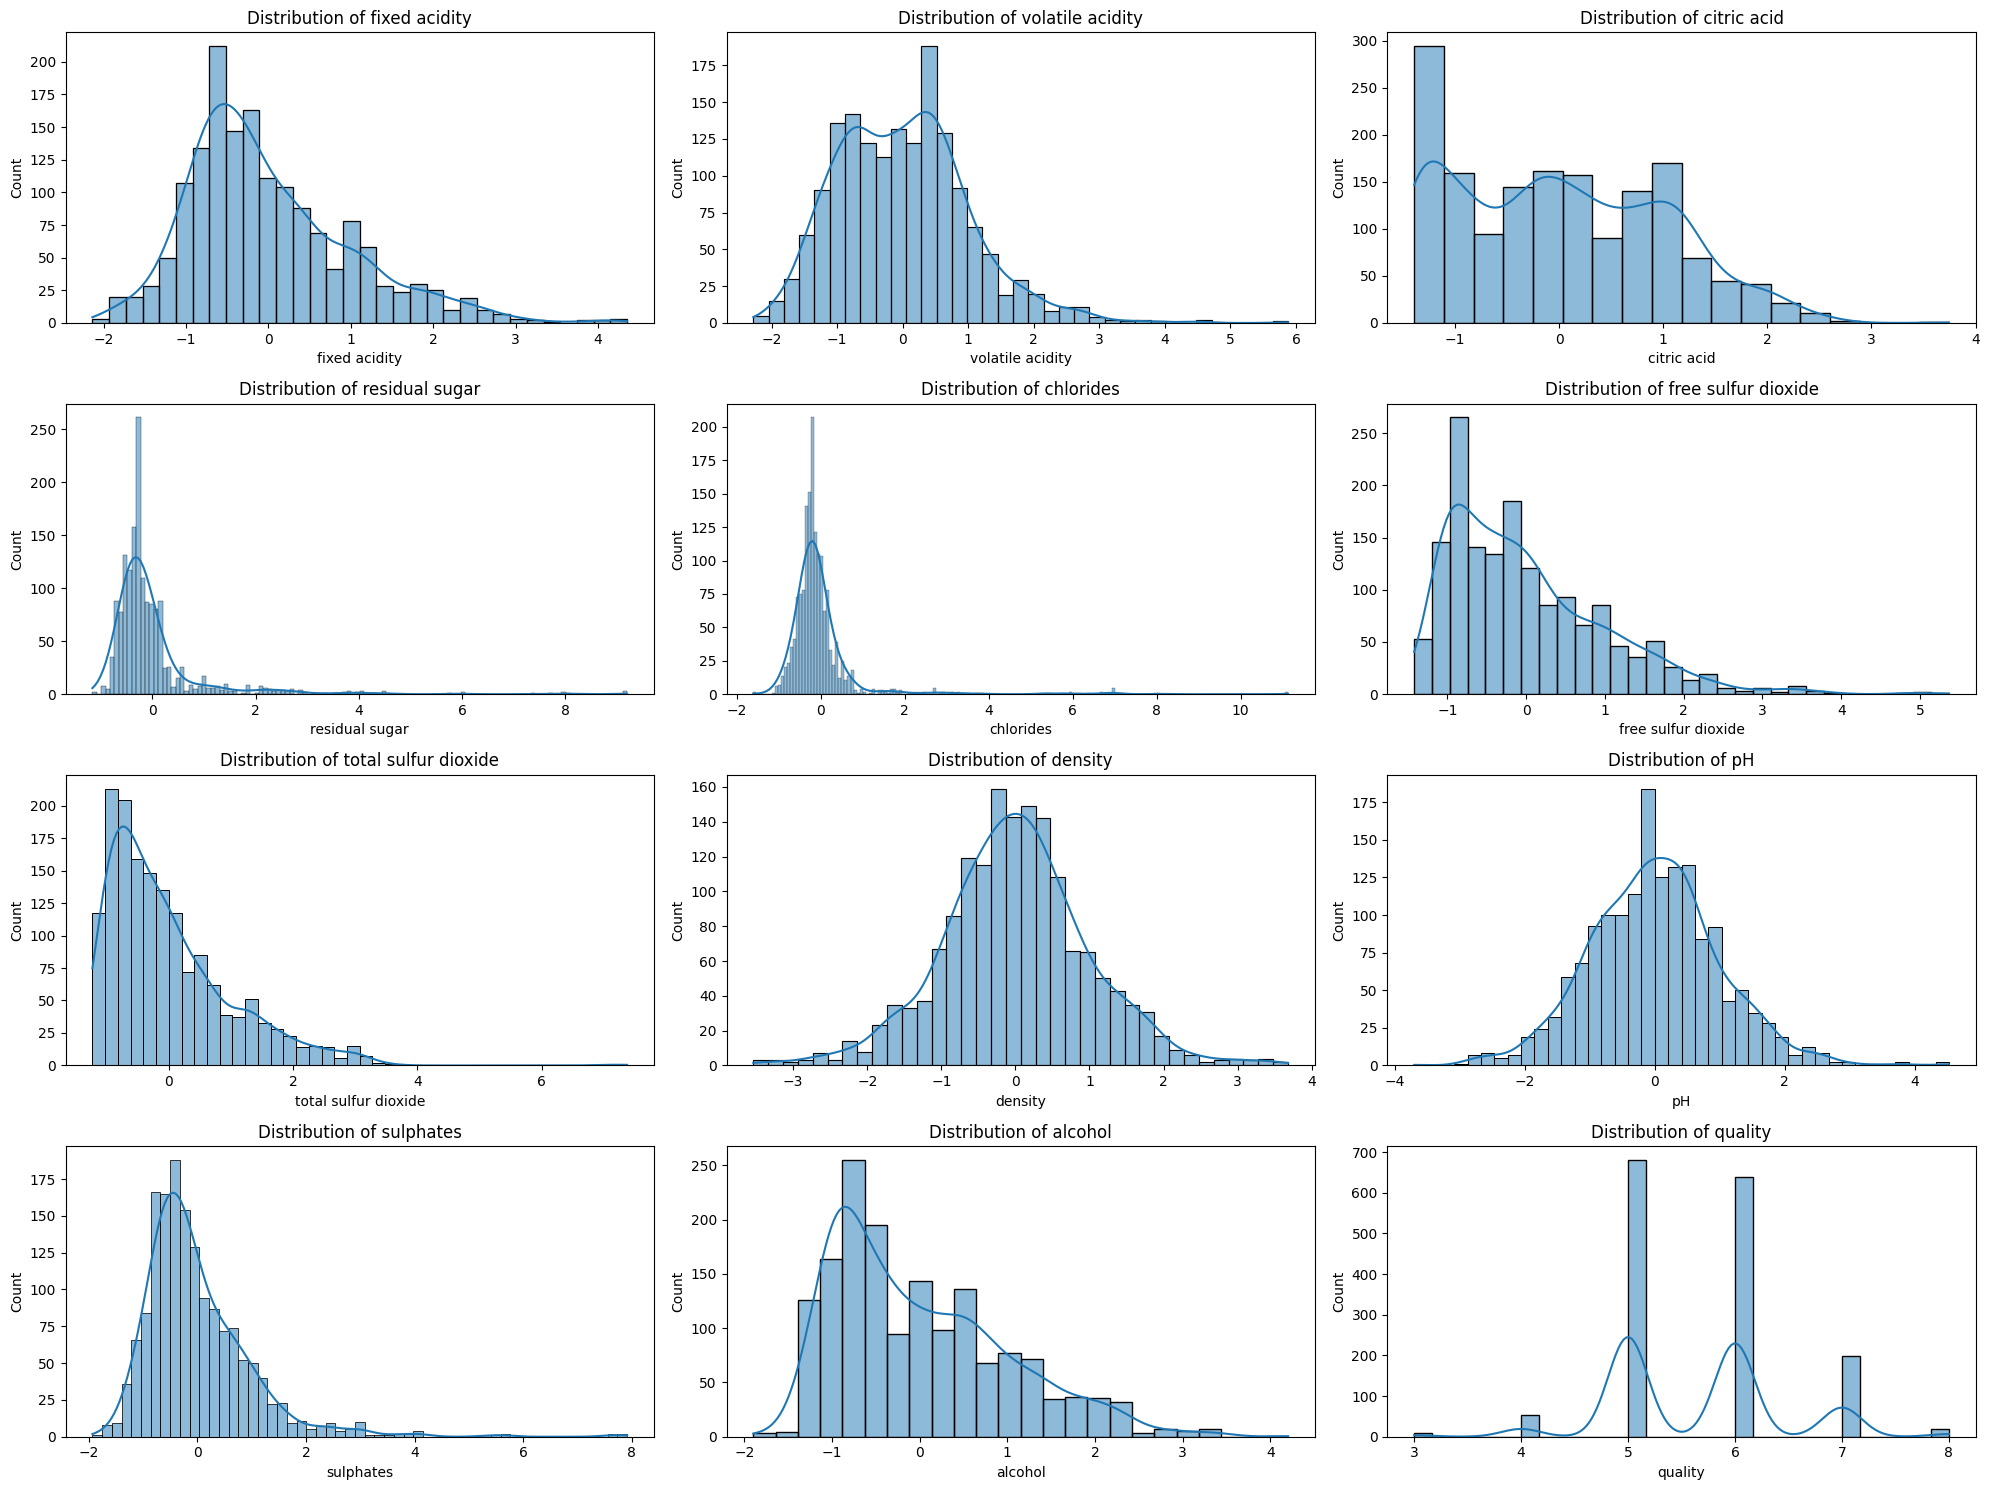

In [9]:
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(4, 3, i + 1)
    sns.histplot(scaled_wine[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Quality vs alcohol'}, xlabel='quality', ylabel='alcohol'>

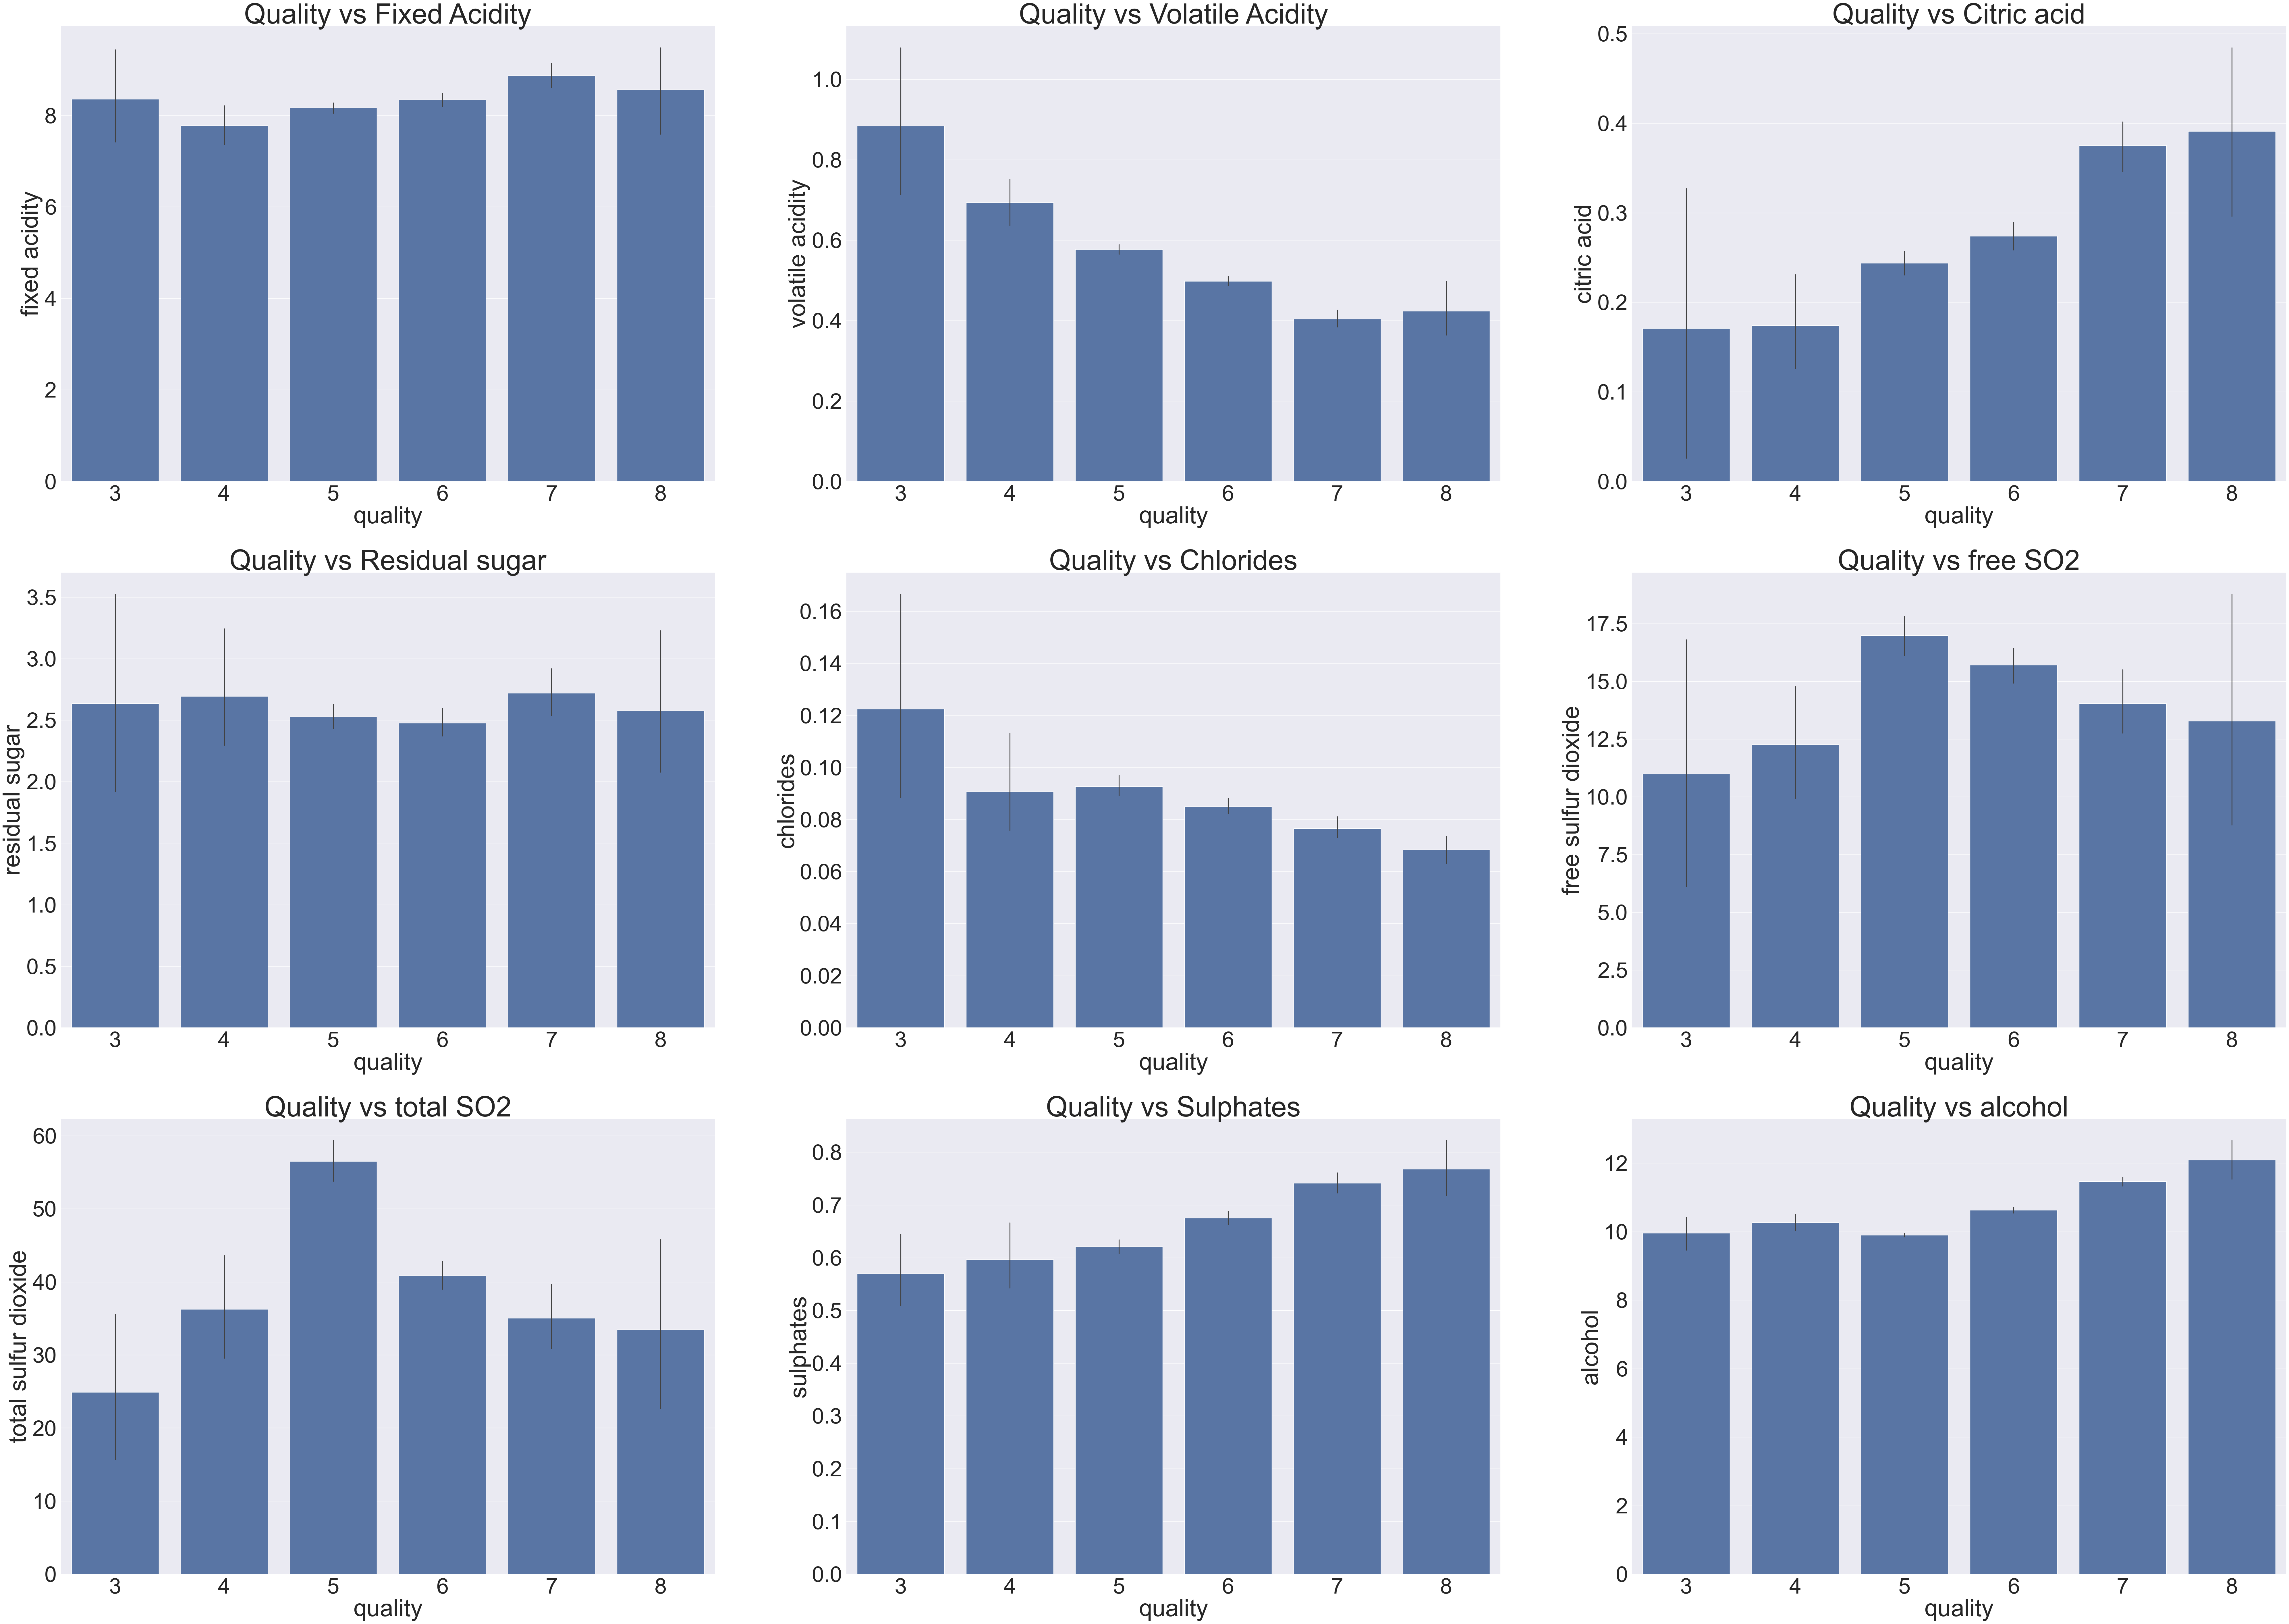

In [23]:
plt.figure(figsize=(100,70))
sns.set(font_scale=5)
plt.subplot(331)
plt.title("Quality vs Fixed Acidity",fontsize=70)
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

plt.subplot(332)
plt.title("Quality vs Volatile Acidity",fontsize=70)
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

plt.subplot(333)
plt.title("Quality vs Citric acid",fontsize=70)
sns.barplot(x = 'quality', y = 'citric acid', data = df)

plt.subplot(334)
plt.title("Quality vs Residual sugar",fontsize=70)
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

plt.subplot(335)
plt.title("Quality vs Chlorides",fontsize=70)
sns.barplot(x = 'quality', y = 'chlorides', data = df)

plt.subplot(336)
plt.title("Quality vs free SO2",fontsize=70)
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

plt.subplot(337)
plt.title("Quality vs total SO2",fontsize=70)
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

plt.subplot(338)
plt.title("Quality vs Sulphates",fontsize=70)
sns.barplot(x = 'quality', y = 'sulphates', data = df)

plt.subplot(339)
plt.title("Quality vs alcohol",fontsize=70)
sns.barplot(x = 'quality', y = 'alcohol', data = df)

In [24]:
bins = (2, 6.5, 8)
classes = ['bad','good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = classes)

In [25]:
label_quality = LabelEncoder()

In [26]:
df['quality'] = label_quality.fit_transform(df['quality'])

In [13]:
covariance = scaled_wine.cov()

# Extract the covariance values with the target variable
target_covariance = covariance['quality'].drop('quality')

In [27]:
df['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

<Axes: title={'center': 'Quality vs Count'}, ylabel='count'>

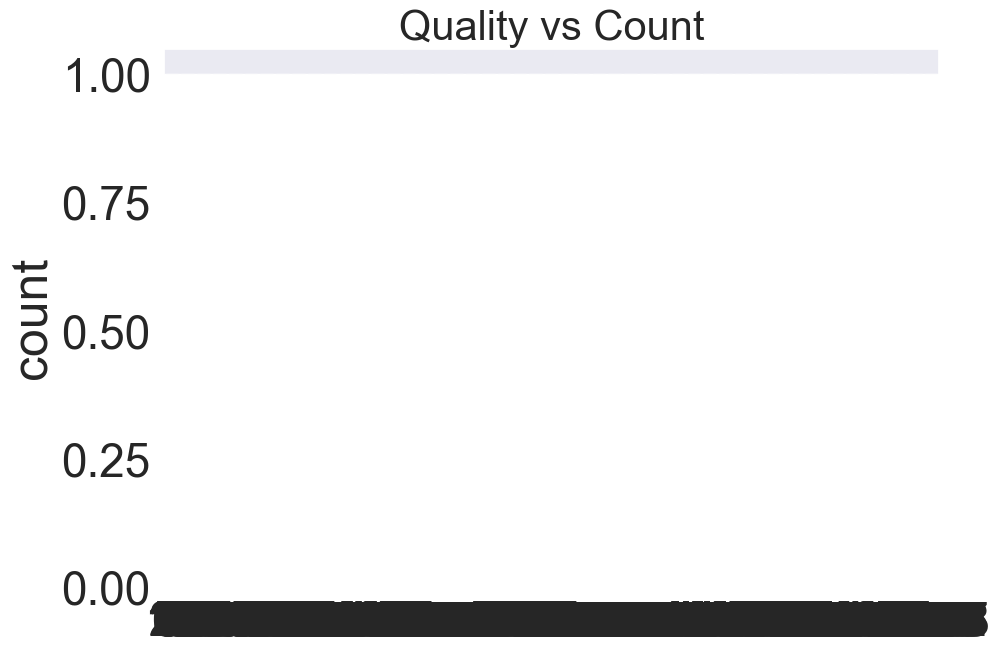

In [28]:
plt.figure(figsize=(10,7))
sns.set(font_scale=3)
plt.title("Quality vs Count",fontsize=30)
sns.countplot(df['quality'])

In [29]:
X = df.drop('quality', axis = 1)
Y = df['quality']

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 21)

In [31]:
sc = StandardScaler()

In [32]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [34]:
RF = RandomForestClassifier(n_estimators=100)
RF.fit(X_train, Y_train)
pred_RF = RF.predict(X_test)

In [35]:
pred1 = accuracy_score(Y_test,pred_RF)
print(pred1*100)

90.0


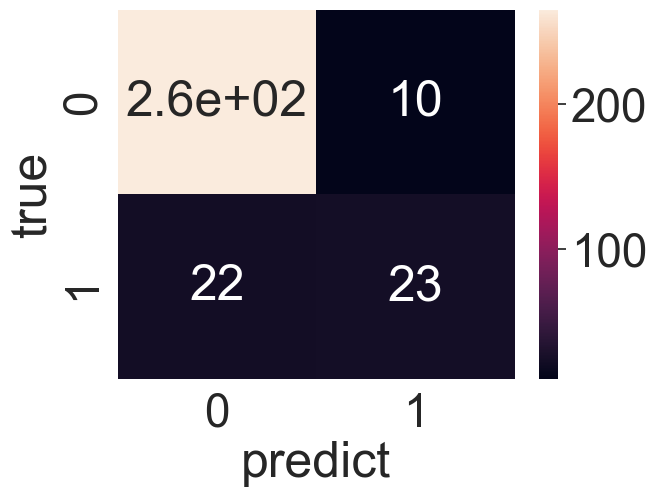

In [36]:
cm1=confusion_matrix(Y_test, pred_RF)
ax1 = sns.heatmap(cm1,annot=True)
ax1.set(xlabel='predict', ylabel='true')
plt.show()

In [37]:
LR = LogisticRegression().fit(X_train,Y_train)

logistic regression accuracy score:  88.75


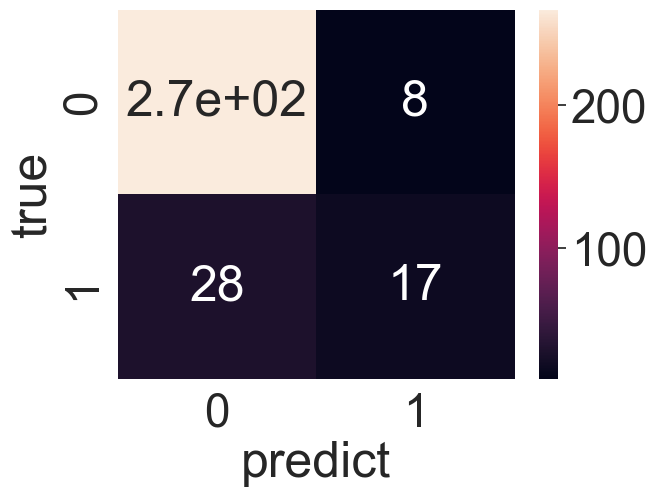

In [38]:
pred_LR = LR.predict(X_test)
cm2 = confusion_matrix(Y_test,pred_LR)
ax2 = sns.heatmap(cm2,annot=True)
ax2.set(xlabel='predict', ylabel='true')
pred2 = accuracy_score(Y_test,pred_LR)
print("logistic regression accuracy score: ",pred2*100)